In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm,datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [12]:
C = 1.0
svc = svm.SVC(kernel = 'rbf',C=100,gamma=10).fit(X,y)

In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

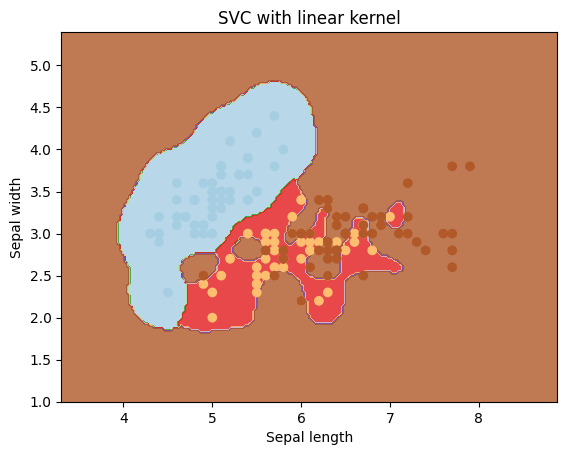

In [14]:
plt.subplot(1,1,1)
Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha = 0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel');

In [ ]:
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('train.csv')
train_y=train['Loan_Status']
train_x=train.drop(["Loan_Status"],axis=1)

test=pd.read_csv('test.csv')
test_y=test['Loan_Status']
test_x=test.drop(["Loan_Status"],axis=1)

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(train_x, train_y)
predicted= support.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
train.to_csv( "pred.csv")